##Scrapping Google Apps Review - MitraDarat
Week 2 NLP Pipeline PBA/ Genap 2025/ Irmasari Hafidz irma@its.ac.id

In [1]:
!pip install google_play_scraper
!pip install textblob
!pip install seaborn

In [2]:
from google_play_scraper import app
import pandas as pd
import numpy as np
import sklearn
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import textblob
#from wordcloud import WordCloud
from pathlib import Path
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

import pickle
import re
import time
import datetime                              # access to %%time, for timing individual notebook cells
import os
from PIL import Image
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import seaborn styles explicitly
import seaborn as sns
# Apply the seaborn style before creating plots
sns.set_style("whitegrid")  # This line sets the Seaborn style

plt.rcParams["figure.figsize"] = (15,10)

In [3]:
#Android App MitraDarat  from Google Play at
#https://play.google.com/store/apps/details?id=ngi.muchi.hubdat&hl=id
#The apps ID found in the link after id=ngi.muchi.hubdat&hl=id
#The apps name on Google Play titled: MitraDarat dari Pemerintah Indonesia (Direktorat Jenderal Perhubungan Darat)
#Dated 8 Sept 2025 and N of reviews 12K

from google_play_scraper import app, Sort, reviews_all

mitradarat_reviews = reviews_all(
    'ngi.muchi.hubdat',
    sleep_milliseconds=0, # defaults to 0
    lang='en', # defaults to 'en'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)

In [4]:
#Save MitraDarat reviews into dataframe
df_mitradaratrev = pd.DataFrame(np.array(mitradarat_reviews),columns=['content'])
df_mitradaratrev = df_mitradaratrev.join(pd.DataFrame(df_mitradaratrev.pop('content').tolist()))
df_mitradaratrev.to_csv(r'df_mitradaratrev', index=False)

## Homework TUGAS 1A

NLP Pipeline:
RAW data (save to csv) lakukan:

* Tokenization
* Lowering
* Stopword Removal
* Lemmatization
* Stemming
* Punctuations Removal
* Expand Contractions
* Spelling Correction
* Rare Words Removal
* Common Words Removal

(save as cleandata.csv)
* Frequent words (n=50,100,1000)
* Frequent Words found (new), contoh: yg, bs, tyt
* ditambahkan di stopwords removal
* Stopwords removal (NLTK, misal case study review hanya dalam Indonesia n=758)


In [5]:
df_mitradaratrev

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,acc604c3-dd4e-49fe-8a59-8c1499e9ae70,Renoadhi T,https://play-lh.googleusercontent.com/a-/ALV-U...,Useful App for travelling. Helps me plan trips...,5,0,1.4.9,2025-09-06 12:18:54,None,NaT,1.4.9
1,4aeff7f0-0aab-4483-b215-ce4db280bd9c,Joel B. Z,https://play-lh.googleusercontent.com/a/ACg8oc...,skrg pengelola bus nya yg tolol. bus bisa sepi...,1,0,1.4.9,2025-09-06 09:51:49,None,NaT,1.4.9
2,e55068b5-017d-44ac-b74f-b5af9b0e5d63,Panji Rafi,https://play-lh.googleusercontent.com/a-/ALV-U...,Very good for tracking. Hopefully there's opti...,5,0,1.4.9,2025-09-06 00:16:01,None,NaT,1.4.9
3,68b49399-6194-4947-9e48-fbcc4e1ad459,Maulana Yusuf,https://play-lh.googleusercontent.com/a-/ALV-U...,one of the best dari aplikasi pemerintah,5,0,1.4.9,2025-08-31 01:53:56,None,NaT,1.4.9
4,8086420f-9f74-49c3-bb4d-ba06999a0e9c,Gabi,https://play-lh.googleusercontent.com/a-/ALV-U...,aplikasinya sering eror. busnya juga jadi keci...,3,0,1.4.9,2025-08-22 06:57:16,None,NaT,1.4.9
...,...,...,...,...,...,...,...,...,...,...,...
240,5c1409d8-3d14-4ae1-bea1-1e19221a2aa1,Achmad Maulana,https://play-lh.googleusercontent.com/a-/ALV-U...,sangat membantu sekali dalam pelayanan mudik g...,5,0,1.0.4,2023-03-13 01:34:35,None,NaT,1.0.4
241,993f12ed-c0da-4e72-8b7a-7f5592705e72,Saiful Anwar,https://play-lh.googleusercontent.com/a-/ALV-U...,"Tidak bisa login, request time out",1,3,1.0.4,2023-03-12 16:06:55,Mohon maaf kami sedang melakukan peningkatan l...,2023-03-12 23:18:16,1.0.4
242,e1992314-2d1b-475e-9a11-0821d79cdbcc,Reynaldo,https://play-lh.googleusercontent.com/a-/ALV-U...,keren UI nya,5,2,None,2023-03-05 10:23:32,None,NaT,None
243,e12650d9-17e8-41ed-9f53-8a772207fb13,Ira Debrina,https://play-lh.googleusercontent.com/a-/ALV-U...,Inovatif,5,2,1.0.0,2023-03-03 06:39:09,None,NaT,1.0.0


In [6]:
df_mitradaratrev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              245 non-null    object        
 1   userName              245 non-null    object        
 2   userImage             245 non-null    object        
 3   content               245 non-null    object        
 4   score                 245 non-null    int64         
 5   thumbsUpCount         245 non-null    int64         
 6   reviewCreatedVersion  216 non-null    object        
 7   at                    245 non-null    datetime64[ns]
 8   replyContent          33 non-null     object        
 9   repliedAt             33 non-null     datetime64[ns]
 10  appVersion            216 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 21.2+ KB


In [7]:
#We do not need data for column reviewId, userName, userImage so
#we will show only these column
df_mitradaratrev.loc[:,["content","score","thumbsUpCount", "reviewCreatedVersion", "at", "replyContent", "repliedAt"]]

,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,Useful App for travelling. Helps me plan trips...,5,0,1.4.9,2025-09-06 12:18:54,None,NaT
1,skrg pengelola bus nya yg tolol. bus bisa sepi...,1,0,1.4.9,2025-09-06 09:51:49,None,NaT
2,Very good for tracking. Hopefully there's opti...,5,0,1.4.9,2025-09-06 00:16:01,None,NaT
3,one of the best dari aplikasi pemerintah,5,0,1.4.9,2025-08-31 01:53:56,None,NaT
4,aplikasinya sering eror. busnya juga jadi keci...,3,0,1.4.9,2025-08-22 06:57:16,None,NaT
...,...,...,...,...,...,...,...
240,sangat membantu sekali dalam pelayanan mudik g...,5,0,1.0.4,2023-03-13 01:34:35,None,NaT
241,"Tidak bisa login, request time out",1,3,1.0.4,2023-03-12 16:06:55,Mohon maaf kami sedang melakukan peningkatan l...,2023-03-12 23:18:16
242,keren UI nya,5,2,None,2023-03-05 10:23:32,None,NaT
243,Inovatif,5,2,1.0.0,2023-03-03 06:39:09,None,NaT


In [8]:
#Check number of reviews scores
df_mitradaratrev['score'].value_counts()

,count
score,
5,123
1,55
3,24
2,23
4,20


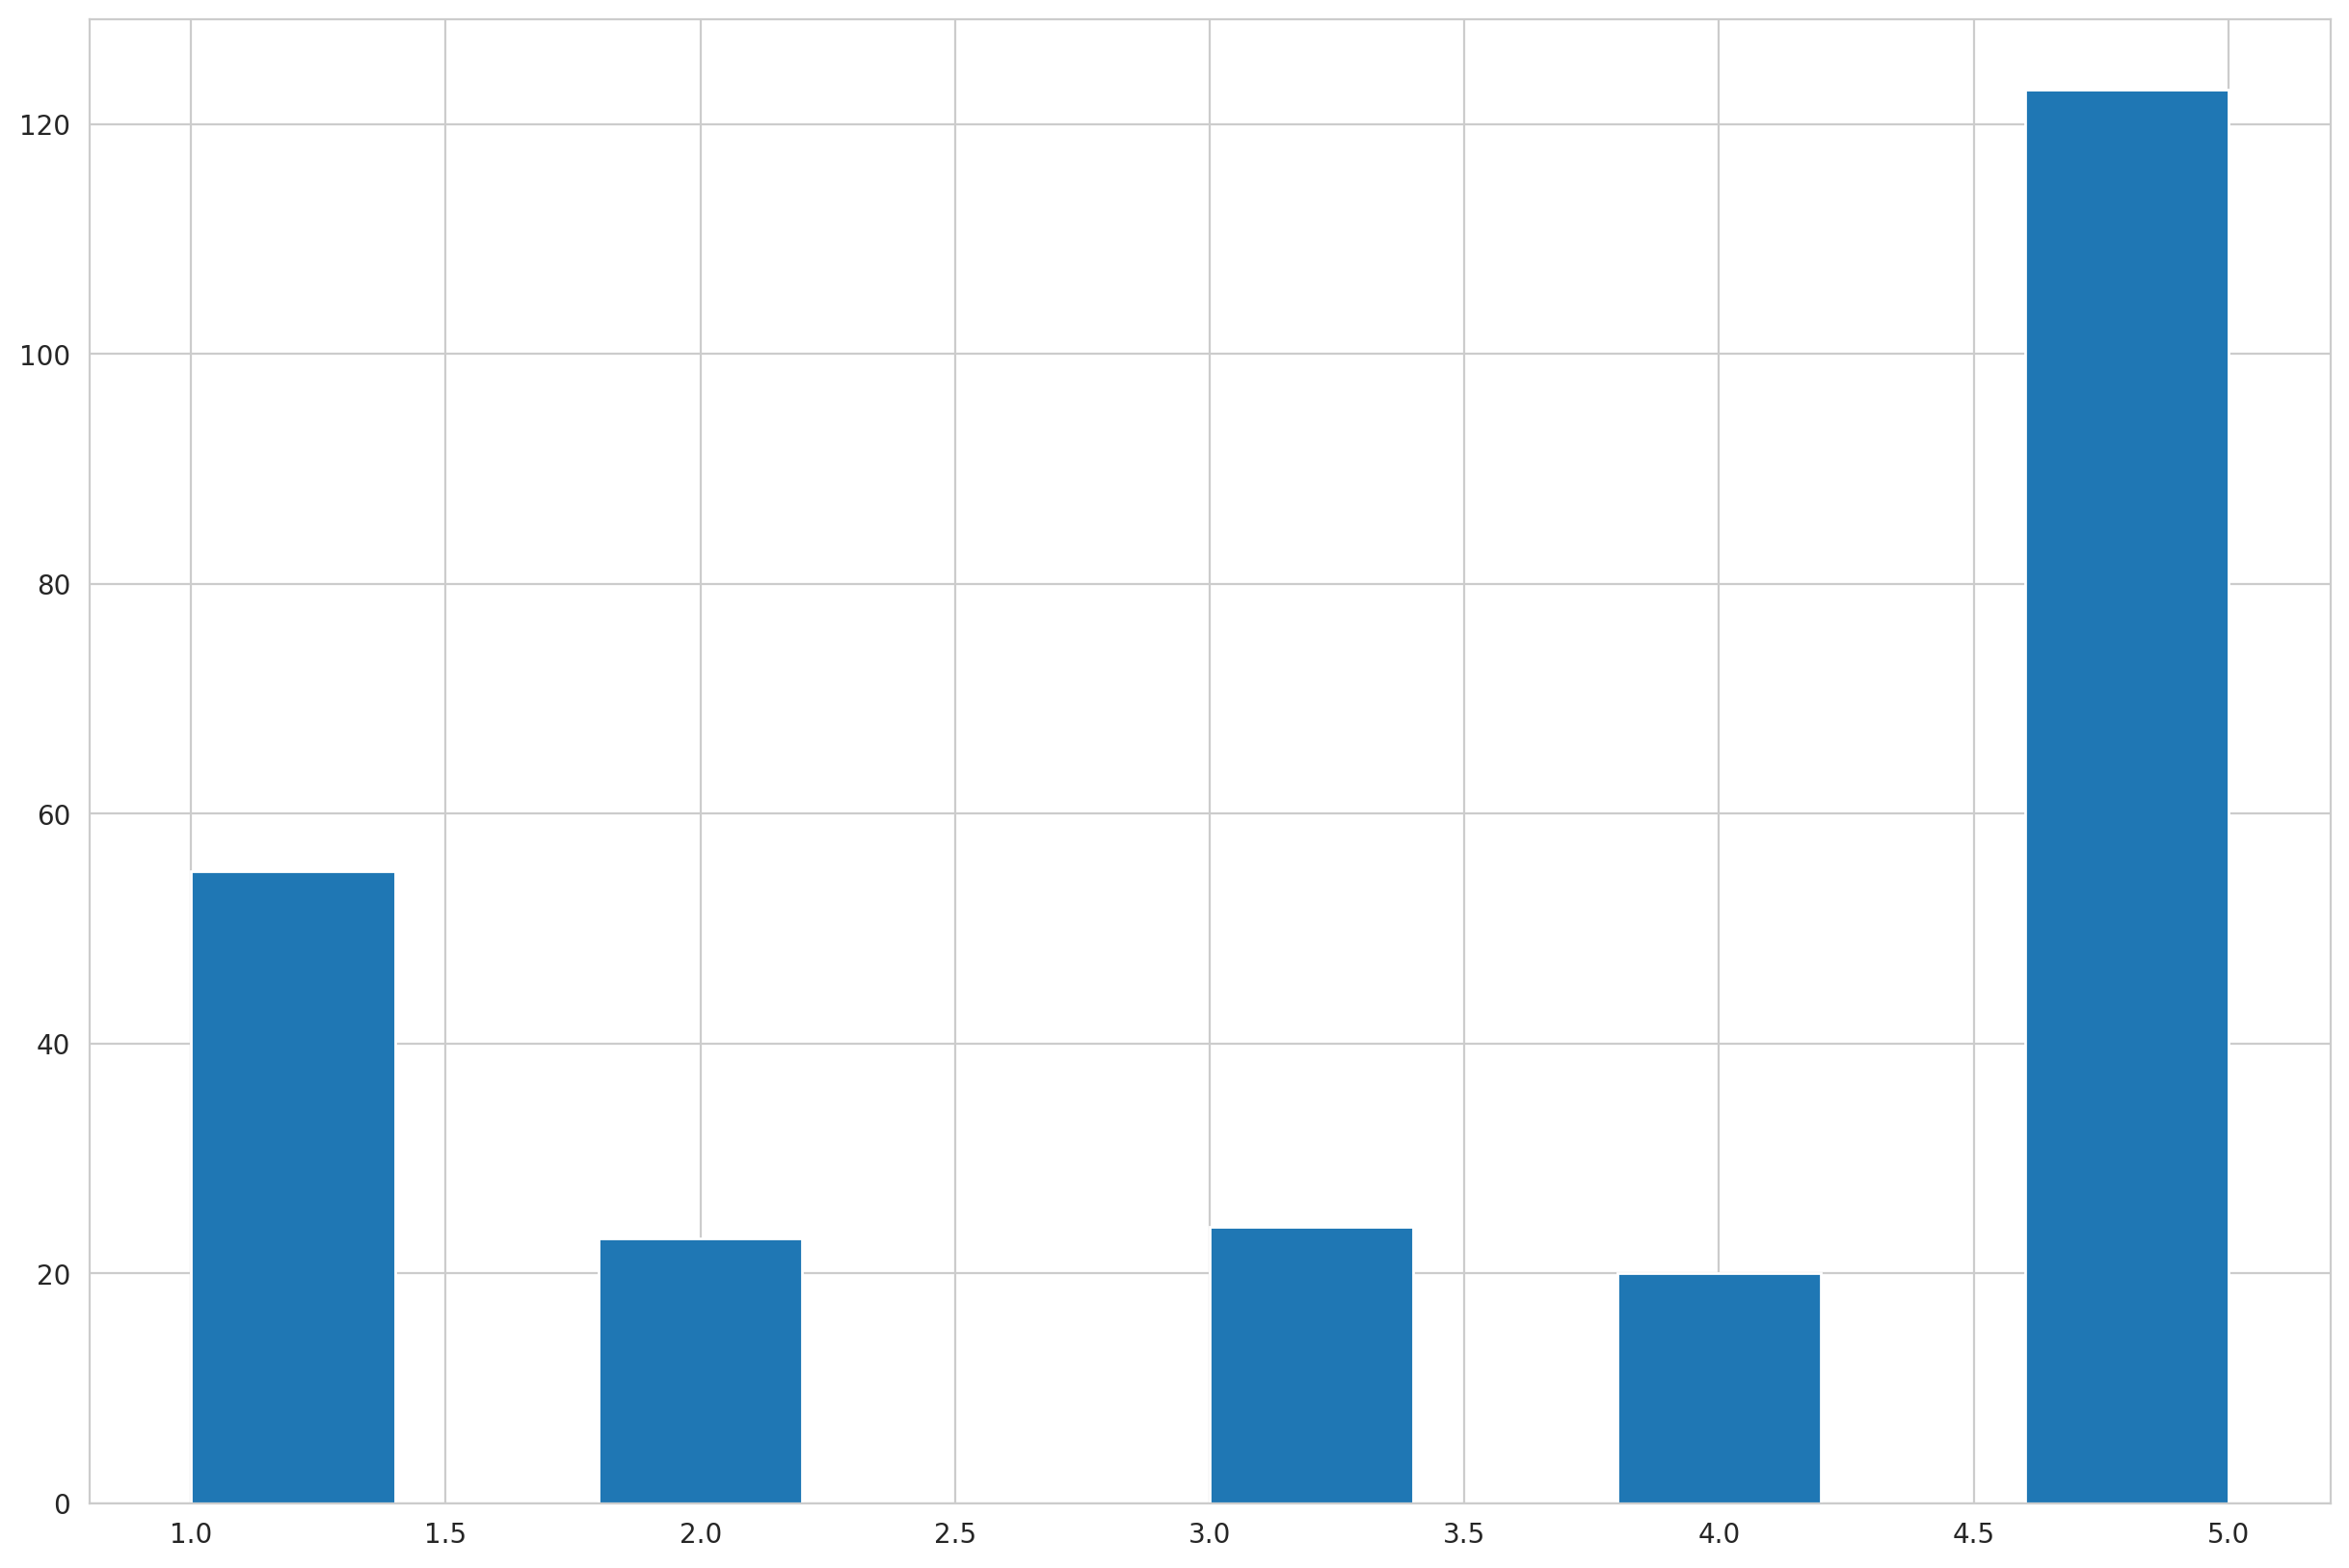

In [9]:
plt.hist(df_mitradaratrev['score'])
plt.show()

In [10]:
!pip install emoji

import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", 200)
#from pandas_profiling import ProfileReport
import regex
import nltk
import wordcloud
import textblob

from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

import string
import re
import emoji

In [11]:
#Creating polarity on the column: content (review from the apps) using TextBlob
#Read https://textblob.readthedocs.io/en/dev/quickstart.html

from textblob import TextBlob
# Handle None values in 'content' column by replacing them with empty strings
df_mitradaratrev['sentiment_polarity'] = df_mitradaratrev['content'].astype(str).apply(lambda x: TextBlob(x).polarity)
df_mitradaratrev['sentiment_subjective'] = df_mitradaratrev['content'].astype(str).apply(lambda x: TextBlob(x).subjectivity)

In [12]:
df_mitradaratrev.loc[:,["content","score","sentiment_polarity", "sentiment_subjective"]]

,content,score,sentiment_polarity,sentiment_subjective
0,Useful App for travelling. Helps me plan trips to places close to public transport.,5,0.1500,0.033333
1,skrg pengelola bus nya yg tolol. bus bisa sepi d satu arah numpuk d jalur sebalik nya.,1,0.0000,0.000000
2,"Very good for tracking. Hopefully there's option paying the ticket from the app itself, it will be a lot easier since other app (gobis) doesn't work this well.",5,0.3925,0.577500
3,one of the best dari aplikasi pemerintah,5,1.0000,0.300000
4,aplikasinya sering eror. busnya juga jadi kecil dan kuotanya kaya ga diperbanyak.,3,0.0000,0.000000
...,...,...,...,...
240,sangat membantu sekali dalam pelayanan mudik gratis dari kemenhub,5,0.0000,0.000000
241,"Tidak bisa login, request time out",1,0.0000,0.000000
242,keren UI nya,5,0.0000,0.000000
243,Inovatif,5,0.0000,0.000000


## Lowercasing

In [13]:
#DATA PREPROCESSING
# Lower casing
# Change the reviews type to string
df_mitradaratrev['content'] = df_mitradaratrev['content'].astype(str)
# Before lowercasing
print(df_mitradaratrev['content'][188])
print(df_mitradaratrev['content'][1])
# print(df_mitradaratrev['content'][20100]) # Removed invalid index

Kurang Transjakarta, semoga segera kerjasama untuk track bus nya
skrg pengelola bus nya yg tolol. bus bisa sepi d satu arah numpuk d jalur sebalik nya.


In [14]:
#Lowercase all reviews to see the difference
df_mitradaratrev['content']= df_mitradaratrev['content'].apply(lambda x: x.lower())
print(df_mitradaratrev['content'][188])
print(df_mitradaratrev['content'][1])

kurang transjakarta, semoga segera kerjasama untuk track bus nya
skrg pengelola bus nya yg tolol. bus bisa sepi d satu arah numpuk d jalur sebalik nya.


##Stopwords Removal
Indonesian Stopwords

In [15]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get Indonesian stopwords
indonesian_stopwords = stopwords.words('indonesian')

# Display first 20 stopwords
print(indonesian_stopwords[:20])

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
#edited from https://www.tensorscience.com/nlp/sentiment-analysis-tutorial-in-python-classifying-reviews-on-movies-and-products
import string

df_mitradaratrev['wordCount'] = [len(review.split()) for review in df_mitradaratrev['content']]
df_mitradaratrev['uppercaseCharCount'] = [sum(char.isupper() for char in review) \
                              for review in df_mitradaratrev['content']]
df_mitradaratrev['specialCharCount'] = [sum(char in string.punctuation for char in review) \
                            for review in df_mitradaratrev['content']]

In [17]:
df_mitradaratrev.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","wordCount","uppercaseCharCount","specialCharCount"]]

,content,score,sentiment_polarity,sentiment_subjective,wordCount,uppercaseCharCount,specialCharCount
0,useful app for travelling. helps me plan trips to places close to public transport.,5,0.1500,0.033333,14,0,2
1,skrg pengelola bus nya yg tolol. bus bisa sepi d satu arah numpuk d jalur sebalik nya.,1,0.0000,0.000000,17,0,2
2,"very good for tracking. hopefully there's option paying the ticket from the app itself, it will be a lot easier since other app (gobis) doesn't work this well.",5,0.3925,0.577500,28,0,7
3,one of the best dari aplikasi pemerintah,5,1.0000,0.300000,7,0,0
4,aplikasinya sering eror. busnya juga jadi kecil dan kuotanya kaya ga diperbanyak.,3,0.0000,0.000000,12,0,2
...,...,...,...,...,...,...,...
240,sangat membantu sekali dalam pelayanan mudik gratis dari kemenhub,5,0.0000,0.000000,9,0,0
241,"tidak bisa login, request time out",1,0.0000,0.000000,6,0,1
242,keren ui nya,5,0.0000,0.000000,3,0,0
243,inovatif,5,0.0000,0.000000,1,0,0


In [18]:
#Add a column name polarity_rating from changing the score of the review into 3 labels: Pos, Negative Neutral
df_mitradaratrev['sentiment_rating'] = df_mitradaratrev['score'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3  else 'Negative'))

In [19]:
df_mitradaratrev.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","sentiment_rating"]]

,content,score,sentiment_polarity,sentiment_subjective,sentiment_rating
0,useful app for travelling. helps me plan trips to places close to public transport.,5,0.1500,0.033333,Positive
1,skrg pengelola bus nya yg tolol. bus bisa sepi d satu arah numpuk d jalur sebalik nya.,1,0.0000,0.000000,Negative
2,"very good for tracking. hopefully there's option paying the ticket from the app itself, it will be a lot easier since other app (gobis) doesn't work this well.",5,0.3925,0.577500,Positive
3,one of the best dari aplikasi pemerintah,5,1.0000,0.300000,Positive
4,aplikasinya sering eror. busnya juga jadi kecil dan kuotanya kaya ga diperbanyak.,3,0.0000,0.000000,Neutral
...,...,...,...,...,...
240,sangat membantu sekali dalam pelayanan mudik gratis dari kemenhub,5,0.0000,0.000000,Positive
241,"tidak bisa login, request time out",1,0.0000,0.000000,Negative
242,keren ui nya,5,0.0000,0.000000,Positive
243,inovatif,5,0.0000,0.000000,Positive


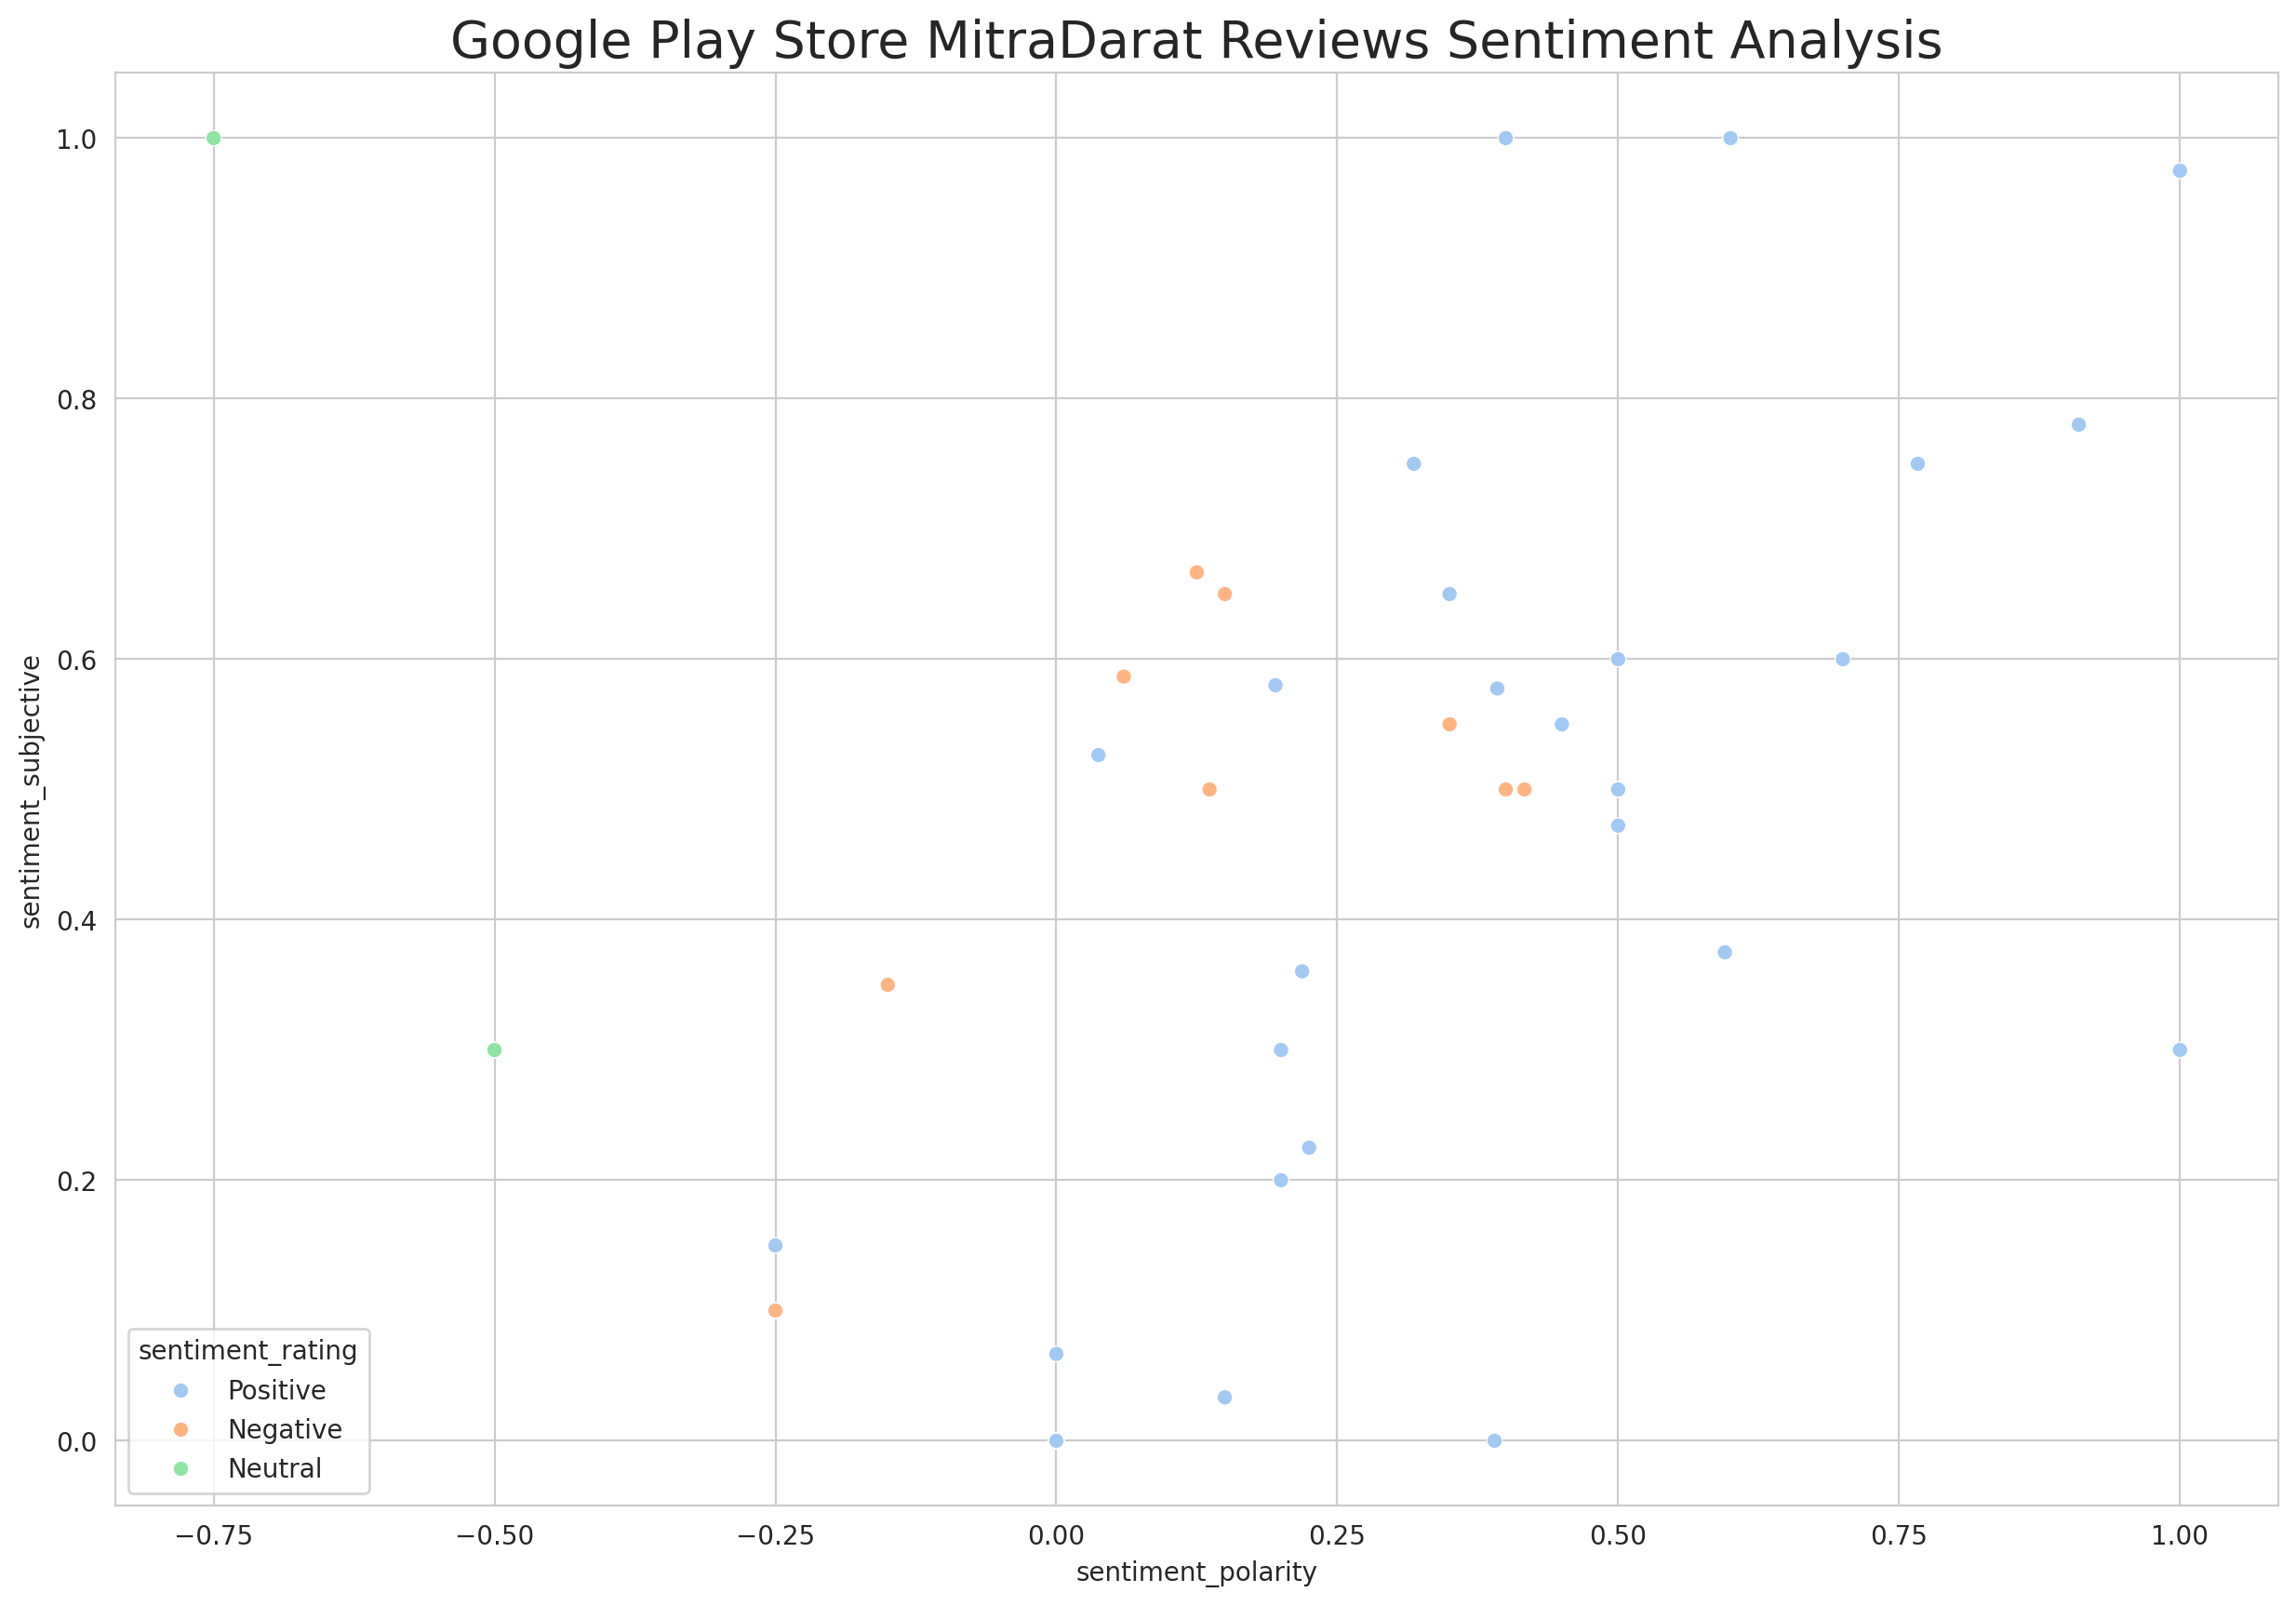

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
# Specify x and y using the 'x' and 'y' parameters within sns.scatterplot
sns.scatterplot(x=df_mitradaratrev['sentiment_polarity'], y=df_mitradaratrev['sentiment_subjective'],
                hue=df_mitradaratrev['sentiment_rating'], edgecolor='white', palette="pastel")
plt.title("Google Play Store MitraDarat Reviews Sentiment Analysis", fontsize=20)
plt.show()

In [21]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  #Import FreqDist from nltk.probability
  from nltk.probability import FreqDist
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)
  plt.figure(figsize=(20,5))
  # Use the 'rainbow' colormap for the bar plot
  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")
  ax.set(ylabel = 'Count')
  plt.show()

/tmp/ipython-input-2152088084.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")


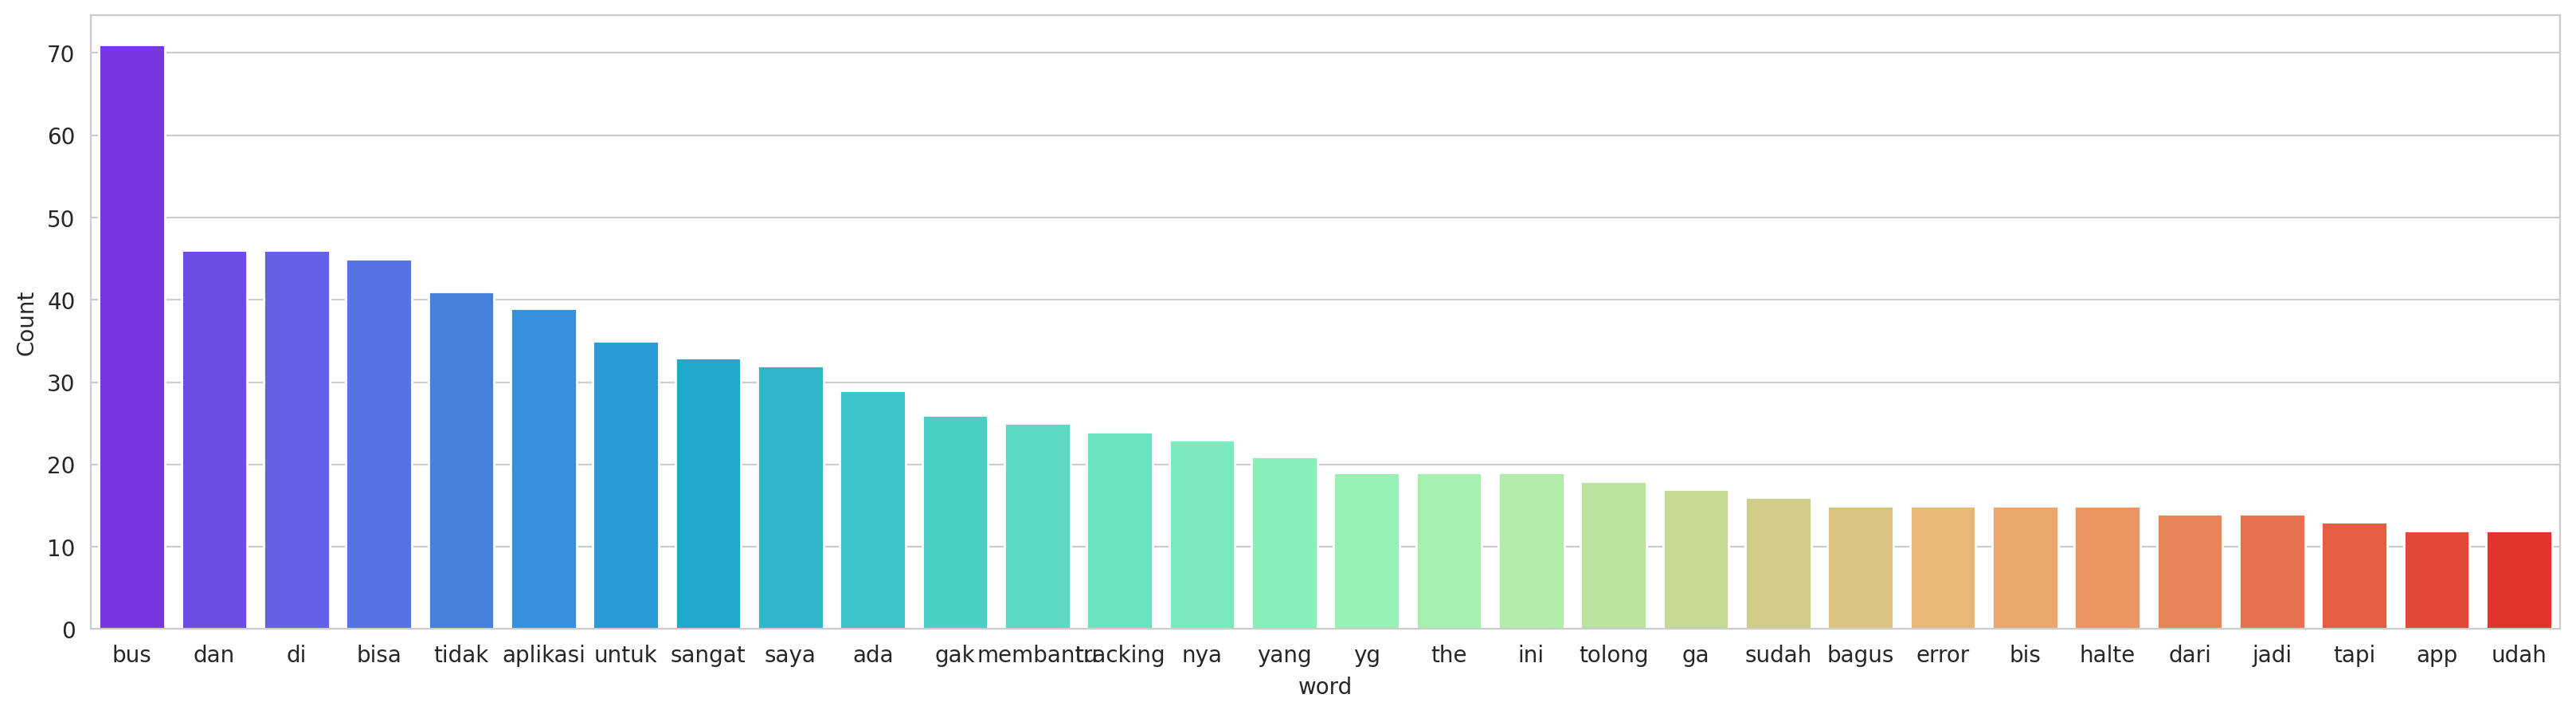

In [22]:
freq_words(df_mitradaratrev['content'])

In [23]:
# prompt: the [content] column hasnt been applied Indonesian stopwords removal using Sastrawi

!pip install Sastrawi

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Create stopword remover
factory = StopWordRemoverFactory()
stopword_remover = factory.create_stop_word_remover()

# Apply stopword removal to the 'content' column
df_mitradaratrev['content'] = df_mitradaratrev['content'].apply(lambda x: stopword_remover.remove(x))

In [24]:
# prompt: can you also apply English stopwords as well to the [content] column

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get English stopwords
english_stopwords = stopwords.words('english')

# Assuming df_mitradaratrev is your DataFrame and 'content' is the column
df_mitradaratrev['content'] = df_mitradaratrev['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in english_stopwords]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
df_mitradaratrev.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","sentiment_rating"]]

,content,score,sentiment_polarity,sentiment_subjective,sentiment_rating
0,useful app travelling. helps plan trips places close public transport.,5,0.1500,0.033333,Positive
1,skrg pengelola bus nya yg tolol. bus sepi satu arah numpuk jalur sebalik nya.,1,0.0000,0.000000,Negative
2,"good tracking. hopefully there's option paying ticket app itself, lot easier since app (gobis) work well.",5,0.3925,0.577500,Positive
3,one best aplikasi pemerintah,5,1.0000,0.300000,Positive
4,aplikasinya sering eror. busnya jadi kecil kuotanya kaya ga diperbanyak.,3,0.0000,0.000000,Neutral
...,...,...,...,...,...
240,sangat membantu sekali pelayanan mudik gratis kemenhub,5,0.0000,0.000000,Positive
241,"bisa login, request time",1,0.0000,0.000000,Negative
242,keren ui nya,5,0.0000,0.000000,Positive
243,inovatif,5,0.0000,0.000000,Positive


In [26]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  #Import FreqDist from nltk.probability
  from nltk.probability import FreqDist
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)
  plt.figure(figsize=(20,5))
  # Use the 'rainbow' colormap for the bar plot
  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")
  ax.set(ylabel = 'Count')
  plt.show()

/tmp/ipython-input-2152088084.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")


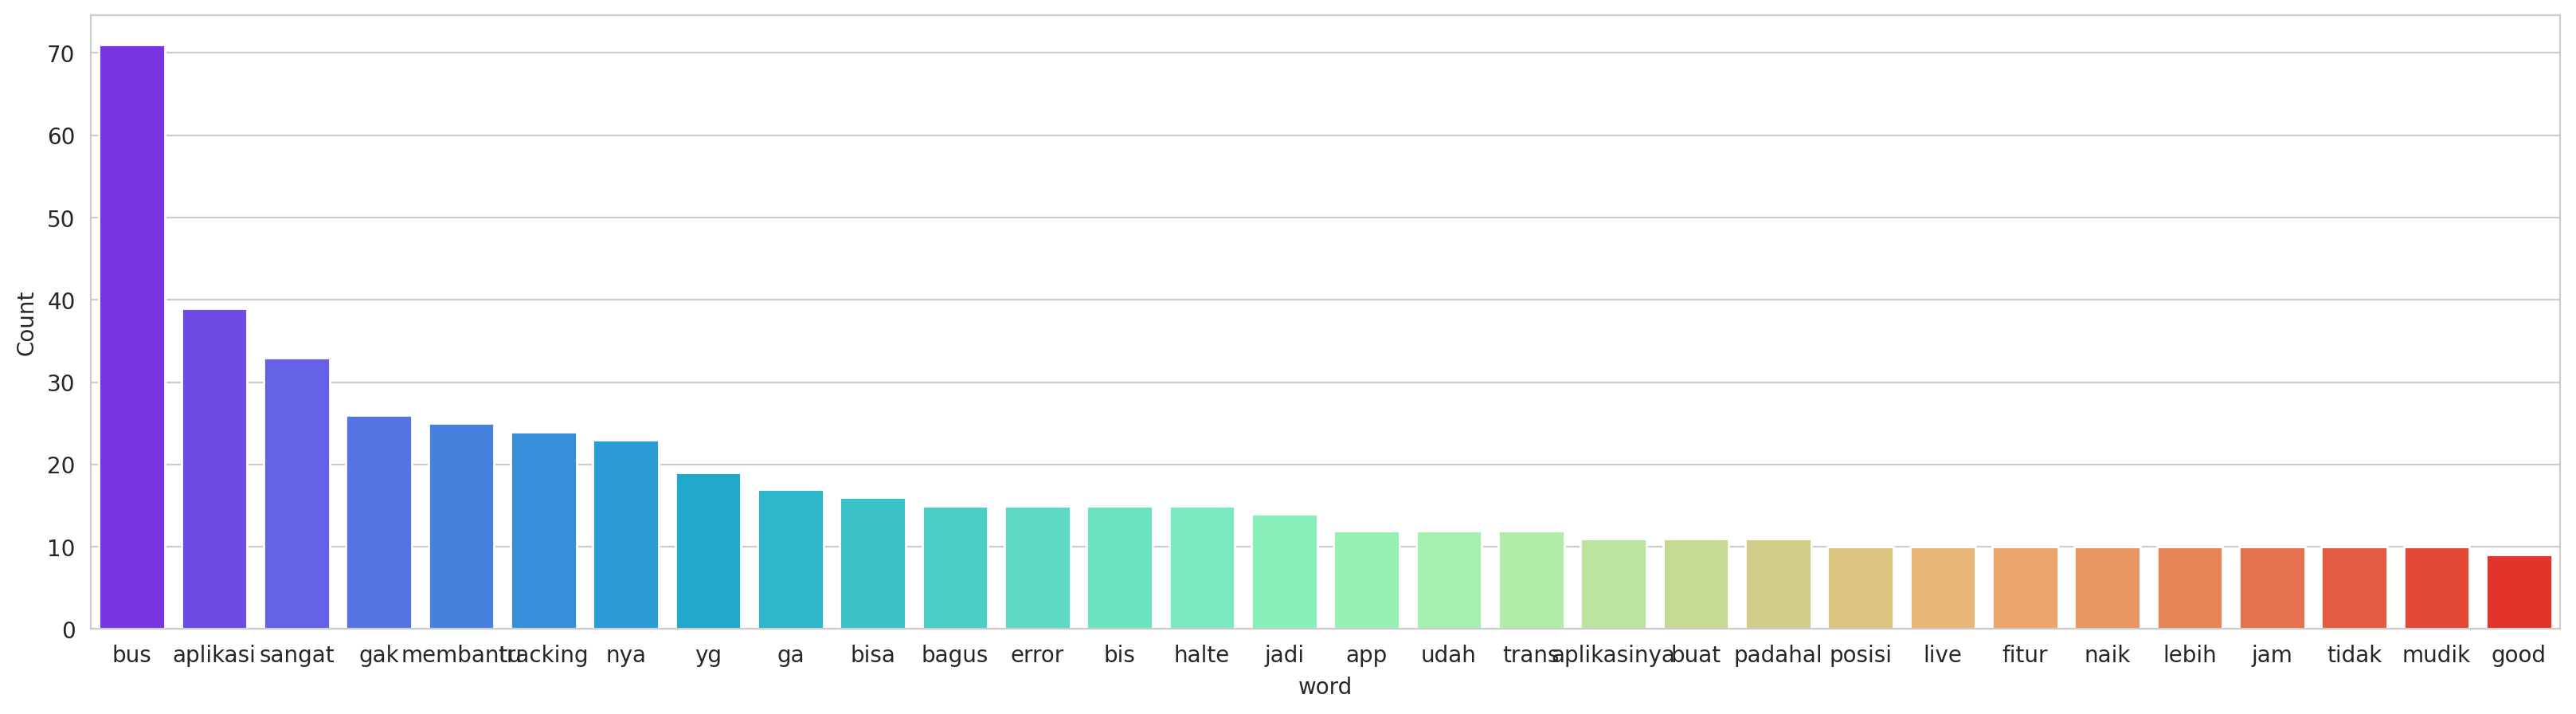

In [27]:
freq_words(df_mitradaratrev['content'])

In [28]:
#Count after stopwords
#edited from https://www.tensorscience.com/nlp/sentiment-analysis-tutorial-in-python-classifying-reviews-on-movies-and-products
import string

df_mitradaratrev['wordCount'] = [len(review.split()) for review in df_mitradaratrev['content']]
df_mitradaratrev['wordCount_after_stopwords'] = [len(review.split()) for review in df_mitradaratrev['content']]